In [17]:
import os
import numpy as np
import pandas as pd
import importlib
import ipywidgets as widgets
import datetime as dt

import stable_baselines3 as sb
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import SubprocVecEnv, VecMonitor
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common import results_plotter

In [18]:
import cpagent
import cprender
import cpenvs

_ = importlib.reload(cpagent)
_ = importlib.reload(cprender)
_ = importlib.reload(cpenvs)

In [3]:
dir = f"../data/{dt.datetime.now().strftime('%Y%m%dT%H%M%SZ')}-a2c-moving/"
print(dir)
os.makedirs(dir, exist_ok=True)

def env_maker():
    return cpenvs.MovingCartpoleEnv(use_normalized_state=True)
env = make_vec_env(env_maker, n_envs=8, vec_env_cls=SubprocVecEnv, monitor_dir=dir)

model = sb.A2C("MlpPolicy", env, verbose=0, tensorboard_log="./dqn_cartpole_tensorboard/")

model.learn(total_timesteps=200_000, log_interval=4, progress_bar=True)
model.save(dir+ "model_a2c_moving")

../data/20240227T210041Z-a2c-moving/


Output()

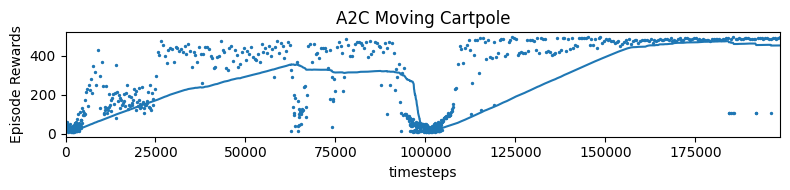

In [4]:
dir = "../data/20240227T210041Z-a2c-moving/"
results_plotter.plot_results([dir], 250_000, results_plotter.X_TIMESTEPS, "A2C Moving Cartpole")

In [19]:
model = sb.A2C.load("../data/20240227T210041Z-a2c-moving/model_a2c_moving")
agent = cpagent.ModelCartPoleAgent(model)

df = cpagent.execute_cartpole(agent, cpenvs.MovingCartpoleEnv(use_normalized_state=True))
df

,ep,t,cart_pos,cart_vel,pole_ang,pole_vel,pos_deviation,reward,cart_pos_setpoint
0,0,0,-0.007698,-0.011677,0.020164,0.034037,-0.007698,NaN,0.000000
1,0,1,-0.007931,0.183150,0.020845,-0.252217,-0.007931,0.999969,0.000000
2,0,2,-0.004268,0.377968,0.015800,-0.538253,-0.004268,0.999991,0.000000
3,0,3,0.003291,0.182628,0.005035,-0.240633,0.003291,0.999995,0.000000
4,0,4,0.006944,-0.012566,0.000223,0.053633,0.006944,0.999976,0.000000
...,...,...,...,...,...,...,...,...,...
10015,19,496,0.636333,0.045977,0.001514,-0.072402,-0.022861,0.999739,0.659195
10016,19,497,0.637253,-0.149167,0.000066,0.220758,-0.021942,0.999759,0.659195
10017,19,498,0.634270,0.045954,0.004481,-0.071904,-0.024925,0.999689,0.659195
10018,19,499,0.635189,0.241012,0.003043,-0.363170,-0.024006,0.999712,0.659195


In [24]:
#df.groupby("ep")["reward"].sum().to_frame("ep_reward").sort_values(by="ep_reward")
df.groupby("ep")["pole_ang"].min().to_frame("maxangle").sort_values(by="maxangle")

,maxangle
ep,
14,-0.324984
17,-0.323386
1,-0.311860
2,-0.247183
7,-0.246012
0,-0.242297
16,-0.241278
12,-0.222107
8,-0.169147


In [7]:
_ = widgets.interact(
    lambda ep, t: cprender.render_cartpole_state_df(df, t, ep),
    ep=widgets.IntSlider(min=0, max=20, step=1, value=0),
    t=widgets.IntSlider(min=0, max=500, step=1, value=0),
)

c:\Source\studienarbeit-ml-controls\.env\lib\site-packages\ipywidgets\widgets\interaction.py:43: DeprecationWarning:

`ipykernel.pylab.backend_inline` is deprecated, directly use `matplotlib_inline.backend_inline`



interactive(children=(IntSlider(value=0, description='ep', max=20), IntSlider(value=0, description='t', max=50…

In [25]:
EP = 14

fig = cprender.lineplot(df, ep=EP, incl_velo=True)
fig.show()